In [1]:
import numpy as np
import pandas as pd

In [2]:
tweets = pd.read_csv('data/tweets/all_tweets.csv')

In [3]:
tweets.head()

,date,tweet,token
0,2022-08-29 02:18:35,First few days just 1k but going to 10k if no ...,"['First', 'few', 'days', 'just', '1k', 'but', ..."
1,2022-08-29 02:11:30,Good to ask yourself this often,"['Good', 'to', 'ask', 'yourself', 'this', 'oft..."
2,2022-08-29 02:11:12,Agreed we recently made this change many An in...,"['Agreed', 'we', 'recently', 'made', 'this', '..."
3,2022-08-28 23:51:49,This will happen again just a matter of time,"['This', 'will', 'happen', 'again', 'just', 'a..."
4,2022-08-28 22:54:36,The swoop of the X is meant to represent the a...,"['The', 'swoop', 'of', 'the', 'X', 'is', 'mean..."


# Financial data preprocessing

In [4]:
import pandas as pd

btc = pd.read_csv('data/crypto_data/BTCUSDT.csv')
eth = pd.read_csv('data/crypto_data/ETHUSDT.csv')
bnb = pd.read_csv('data/crypto_data/BNBUSDT.csv')
doge = pd.read_csv('data/crypto_data/DOGEUSDT.csv')

In [5]:
df_list = [btc, eth, bnb, doge]

In [6]:
for df in df_list:
    df['date_time'] = pd.to_datetime(df['date_time'])
    #keep only the date_time, close, volume columns
    df.drop(df.columns.difference(['date_time', 'close', 'volume']), 1, inplace=True)

C:\Users\levit\AppData\Local\Temp\ipykernel_28416\4026625009.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['date_time', 'close', 'volume']), 1, inplace=True)
C:\Users\levit\AppData\Local\Temp\ipykernel_28416\4026625009.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['date_time', 'close', 'volume']), 1, inplace=True)
C:\Users\levit\AppData\Local\Temp\ipykernel_28416\4026625009.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['date_time', 'close', 'volume']), 1, inplace=True)
C:\Users\levit\AppData\Local\Temp\ipykernel_28416\4026625009.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except 

In [7]:
#remove all the data points before 2018-01-01
from datetime import datetime

#add time stamp column
for df in df_list:
    df['time_stamp'] = df['date_time'].apply(lambda x: x.timestamp())

### Add minute returns

In [8]:
#calculate the d minute returns for 1, 10, 20, 30, 45, 60, 120 minutes
minutes_list = [1, 10, 20, 30, 45, 60, 120]

for df in df_list:
    for minutes in minutes_list:
        df[f'{minutes}m_return'] = df['close'].pct_change(minutes)

In [9]:
btc

,date_time,close,volume,time_stamp,1m_return,10m_return,20m_return,30m_return,45m_return,60m_return,120m_return
0,2017-12-31 23:01:00,13707.92,2.844266,1.514761e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-12-31 23:02:00,13694.92,2.113138,1.514761e+09,-0.000948,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-12-31 23:03:00,13680.00,1.346411,1.514761e+09,-0.001089,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-12-31 23:04:00,13645.99,11.589417,1.514761e+09,-0.002486,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-12-31 23:05:00,13600.00,15.724566,1.514762e+09,-0.003370,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2442868,2022-08-29 23:57:00,20301.07,180.143200,1.661817e+09,-0.000018,-0.001661,0.001144,0.002072,0.007660,0.006223,0.004655
2442869,2022-08-29 23:58:00,20298.56,108.558190,1.661817e+09,-0.000124,-0.000579,0.000980,0.002598,0.007284,0.005131,0.004412
2442870,2022-08-29 23:59:00,20294.29,92.691750,1.661818e+09,-0.000210,0.000284,0.000216,0.002955,0.007195,0.004981,0.004063
2442871,2022-08-30 00:00:00,20285.73,112.040570,1.661818e+09,-0.000422,-0.000090,-0.001101,0.002501,0.006246,0.004052,0.004067


### Add log volume

In [ ]:
import numpy as np

for df in df_list:
    df['log_volume'] = np.log(df['volume'])
    df['change_in_log volume'].pct_change(1)
    

c:\Users\levit\.pyenv\pyenv-win\versions\3.10.7\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\levit\.pyenv\pyenv-win\versions\3.10.7\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\levit\.pyenv\pyenv-win\versions\3.10.7\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\levit\.pyenv\pyenv-win\versions\3.10.7\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
def calculate_adjusted_volumes(data, adjusted_volumes):
    for index in data.index:
        time = data['date_time'][index].time()
        date = data['date_time'][index].date()
        
        total_volume = 0
        n=0
        for index2 in data.index:
            if(data['date_time'][index2].time() == time):
                total_volume += data['volume'][index2]
                n+=1
        adjusted_volumes.append(total_volume/n)
    return adjusted_volumes

# Generate word Histogram

In [17]:
frequent_words = pd.read_csv('data/tweets/word_count_filtered.csv')


In [19]:
frequent_words.head(25)

,word,count
0,yes,526
1,like,391
2,would,385
3,much,367
4,good,305
5,time,300
6,great,299
7,car,292
8,make,283
9,yeah,272


In [68]:
top_frequent_words = frequent_words[:25].drop([16],axis=0).reset_index(drop=True)
top_frequent_words

,word,count
0,yes,526
1,like,391
2,would,385
3,much,367
4,good,305
5,time,300
6,great,299
7,car,292
8,make,283
9,yeah,272


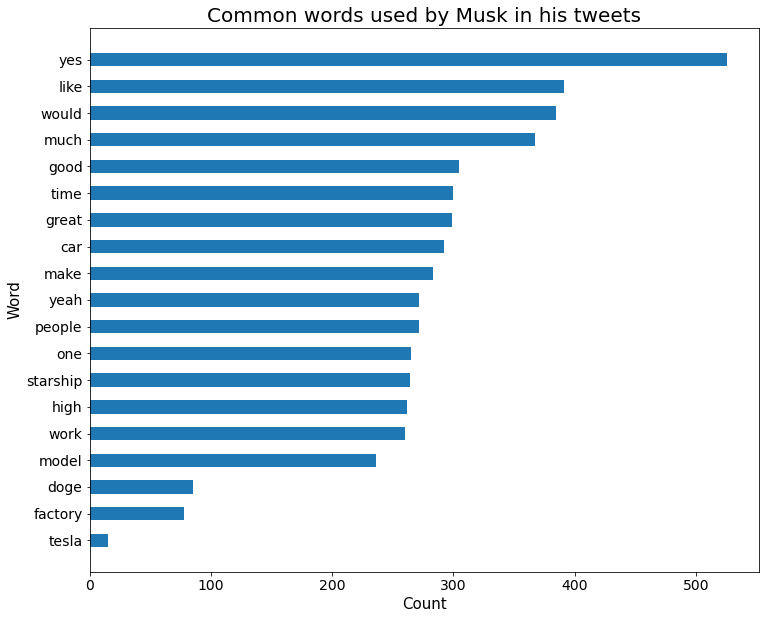

In [162]:
# create a histogram plot of the top frequent_words_filtered, with the word as the y-axis and the count as the x-axis
from cProfile import label
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
   
words = top_frequent_words['word'][::-1]

count = top_frequent_words['count'][::-1]

count = count.tail(15)

words = words.tail(15)

word= frequent_words[frequent_words['word'] == 'doge']
selected_word = word['word'].iloc[0]
c = word['count'].values.sum()





words = pd.concat([pd.Series('model'), words]).reset_index(drop=True)
count = pd.concat([pd.Series(236), count]).reset_index(drop=True)

#insert the word in the begining of words
words = pd.concat([pd.Series(selected_word), words]).reset_index(drop=True)
count = pd.concat([pd.Series(c), count]).reset_index(drop=True)

words = pd.concat([pd.Series('factory'), words]).reset_index(drop=True)
count = pd.concat([pd.Series(78), count]).reset_index(drop=True)


words = pd.concat([pd.Series('tesla'), words]).reset_index(drop=True)
count = pd.concat([pd.Series(15), count]).reset_index(drop=True)

plt.barh(words, count, height=0.5)
plt.title('Common words used by Musk in his tweets', fontsize=20)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Word', fontsize = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figures/most_common_words.png', facecolor='white', edgecolor='none')
plt.show()



In [163]:
df = pd.DataFrame({'word':words, 'count':count})
df.to_csv('data/tweets/final_words.csv', index=False)

# Generate Word Cloud

# General effect of Elon Musk Tweeting

# Naive approach based on single words

# Topic based approach

# Trading Startegy